Researching the impact of amount of dimensions for a certain epsilon.
Instead of having a linechart with the epsilons on the x-axis, we will show the dimensions for the heart dataset and seed dataset.
We do this only for the nd-Laplace algorithm.



In [5]:
from Helpers import helpers, UtilityPlotter
# we select epsilon 3.0 for now
epsilon = 3
plain_df, perturbed_df = helpers.load_plain_and_perturbed_dataset(epsilon, perturbed_path='../ExperimentRunners/data/nd-laplace-truncated/heart-dataset/', import_path='../data/heart-dataset/heart_numerical.csv')
plain_df.head()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,class
0,120.0,0.0,0.0,0.0,0.0,64.0,62.0,126.0,2.0,1.0
1,132.0,4.0,0.0,4.0,2.0,130.0,68.0,198.0,6.0,0.0
2,133.0,2.0,0.0,5.0,2.0,130.0,68.0,198.0,5.0,0.0
3,134.0,2.0,0.0,6.0,2.0,117.0,53.0,170.0,11.0,0.0
4,132.0,4.0,0.0,5.0,0.0,117.0,53.0,170.0,9.0,0.0


In [6]:
from sklearn.cluster import DBSCAN, KMeans, OPTICS

models = [KMeans(n_clusters=4, init="random", algorithm="lloyd")]

In [7]:
import numpy as np
import pandas as pd 


def run_for_dimensions_and_algorithms(X: pd.DataFrame, epsilon, model, perturbing_mechanisms, n_times = 10, dataset=None, import_path='../data/heart-dataset/heart_numerical.csv'):
    if(dataset is None):
        raise Exception('Dataset cannot be None')
    
    column_size = X.shape[1]
    dataframe = pd.DataFrame();
    for algorithm in perturbing_mechanisms:
        print('Running for algorithm ' + algorithm)
        perturbed_path = f'../ExperimentRunners/data/{algorithm}/{dataset}/'
        data = run_for_dimensions(perturbed_df, epsilon, column_size, model, n_times, algorithm, import_path, perturbed_path)
        dataframe = pd.concat([dataframe, data], ignore_index=True)
    return dataframe

def run_for_dimensions(epsilon, max_columns, models, n_times = 10, model_name = None, import_path='./', perturbed_path='../ExperimentRunners/data/nd-laplace-truncated/heart-dataset/'):
    dataframe = {'type': [], 'dimensions': [], 'ari': [], 'ami': [], 'ch': [], 'sc': []}

    for col in range(4, max_columns):
        print('Adding one column each time...')
        data = perturbed_df.iloc[:,0:col]
        columns = data.columns
        print(data.shape)

        for model in models:
            algorithmName = model_name if model_name is not None else helpers.map_models_to_name(model)
            dataframe['type'].append(algorithmName)
            dataframe['dimensions'].append(col)
            ami_list = []
            ari_list = []
            ch_list = []
            sc_list = []
            for i in range(n_times):
                ami, ari, ch, sc = helpers.measure_external_validity_report(epsilon, model, import_path=import_path, perturbed_path=perturbed_path, columns=columns)
                ami_list.append(ami)
                ari_list.append(ari)
                ch_list.append(ch)
                sc_list.append(sc)
            ami = np.sum(ami_list) / n_times
            ari = np.sum(ari_list) / n_times
            sc = np.sum(sc_list) / n_times
            dataframe['ami'].append(ami)
            dataframe['ari'].append(ari)
            dataframe['ch'].append(np.sum(ch_list) / n_times)
            dataframe['sc'].append(np.sum(sc_list) / n_times)
    return pd.DataFrame(dataframe)



In [53]:
from matplotlib import pyplot as plt
import seaborn as sns


def run_for_dimensions_and_epsilons(X: pd.DataFrame, models, perturbing_mechanisms, epsilons, n_times = 10, dataset=None, import_path='../data/heart-dataset/heart_numerical.csv', save_path=None):
    complete_set = pd.DataFrame()
    for epsilon in epsilons:
        print('Running for epsilon ' + str(epsilon))
        dataframe = run_for_dimensions_and_algorithms(X, epsilon, models, perturbing_mechanisms, n_times, import_path=import_path, dataset=dataset)
        dataframe['epsilon'] = epsilon
        complete_set = pd.concat([complete_set, dataframe], ignore_index=True)

    if save_path is not None:
        complete_set.to_csv(save_path + '.csv')
    return complete_set

def plot_dimensions(metric: str, epsilon, dataframe, dataset, ylabel='Adjusted Rand Index (ARI)', xlabel='dimensions', save_path=None):
    dataframe_for_epsilon = dataframe.copy()
    dataframe_for_epsilon = dataframe_for_epsilon[dataframe_for_epsilon['epsilon'] == epsilon]
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.set_title(f"Scores per dimension, with metric: {metric.upper()} and epsilon: {epsilon} for dataset: {dataset}")
    #ax.set_title('Esilon ' + str(epsilon))
    ax.set_xlabel(xlabel)    
    ax.set_ylabel(ylabel)
    sns.lineplot(x='dimensions', y=metric, data=dataframe_for_epsilon, style='type', hue='type', errorbar=None, markers=True, legend=True, ax=ax)
    #plt.title(f'{metric} for different dimensions and epsilons'.capitalize())

    if save_path is not None:
        fig.savefig(save_path + '.png')
        plt.clf()
    else:
        plt.show()


In [56]:
dataframe_dimension_scores = run_for_dimensions_and_epsilons(plain_df, models, ['nd-laplace', 'nd-laplace-truncated', 'nd-laplace-optimal-truncated', 'nd-piecewise'], helpers.get_experiment_epsilons(), dataset='heart-dataset', n_times=10)


Running for epsilon 0.1
Running for algorithm nd-laplace
Adding one column each time...
(2126, 4)
Adding one column each time...
(2126, 5)
Adding one column each time...
(2126, 6)
Adding one column each time...
(2126, 7)
Adding one column each time...
(2126, 8)
Adding one column each time...
(2126, 9)
Running for algorithm nd-laplace-truncated
Adding one column each time...
(2126, 4)
Adding one column each time...
(2126, 5)
Adding one column each time...
(2126, 6)
Adding one column each time...
(2126, 7)
Adding one column each time...
(2126, 8)
Adding one column each time...
(2126, 9)
Running for algorithm nd-laplace-optimal-truncated
Adding one column each time...
(2126, 4)
Adding one column each time...
(2126, 5)
Adding one column each time...
(2126, 6)
Adding one column each time...
(2126, 7)
Adding one column each time...
(2126, 8)
Adding one column each time...
(2126, 9)
Running for algorithm nd-piecewise
Adding one column each time...
(2126, 4)
Adding one column each time...
(212

In [57]:
dataframe_dimension_scores.head()

,type,dimensions,ari,ami,ch,sc,epsilon
0,nd-laplace,4,0.035207,0.065540,612.306970,0.224294,0.1
1,nd-laplace,5,0.237853,0.302987,517.280049,0.208052,0.1
2,nd-laplace,6,0.290262,0.349564,462.609156,0.178759,0.1
3,nd-laplace,7,0.577007,0.588808,533.149369,0.220521,0.1
4,nd-laplace,8,0.380493,0.444013,477.479106,0.208601,0.1


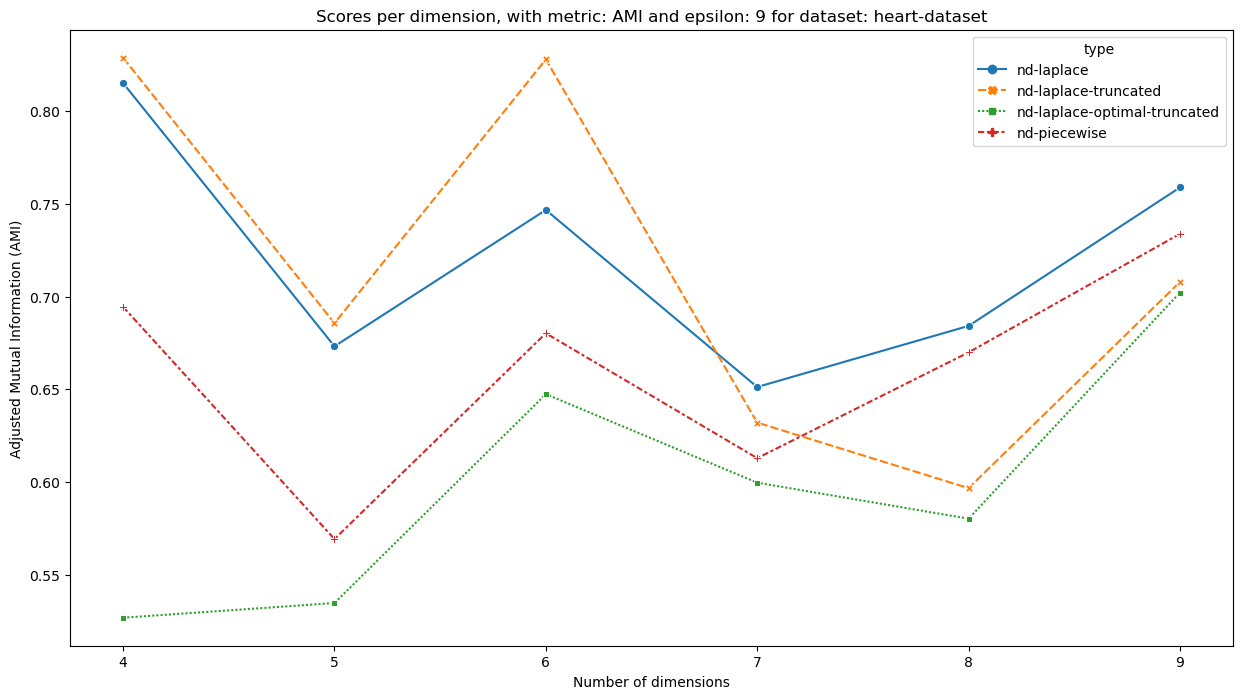

In [61]:
plot_dimensions('ami', 9, dataframe_dimension_scores, 'heart-dataset', ylabel='Adjusted Mutual Information (AMI)', xlabel='Number of dimensions')